In [1]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding, SpectralEmbedding
from sklearn.cluster import SpectralClustering, KMeans
from scipy.sparse import linalg, eye
from pyamg import smoothed_aggregation_solver
from sklearn import neighbors
from sklearn.neighbors import kneighbors_graph
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [2]:
X = pd.read_csv('Circle_data.csv', names = ['x','y'])[1:].to_numpy()
t = pd.read_csv('Circle_label.csv').to_numpy()

In [4]:
StdScaler = StandardScaler()
X_std = StdScaler.fit_transform(X)

In [62]:
# create sample dataset, model
#X, t = make_swiss_roll(n_samples=1600, noise=0.3, random_state=23)

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=23)
se = SpectralEmbedding(n_components=2, random_state=23)

lle.fit(X)
se.fit(X_std)

SpectralEmbedding(random_state=23)

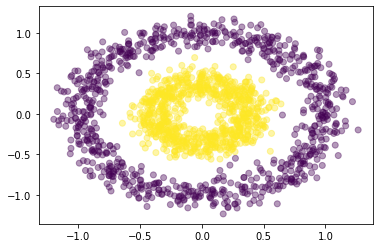

In [63]:
plt.scatter(X[:,0], X[:,1], c = t, alpha=0.4)
plt.savefig("Circle_data.png",dpi=400)
plt.show()

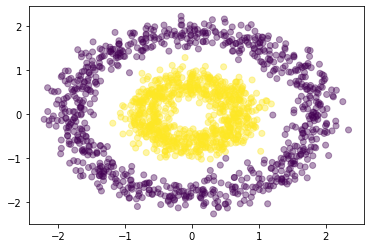

In [64]:
plt.scatter(X_std[:,0], X_std[:,1], c = t, alpha=0.4)
plt.show()

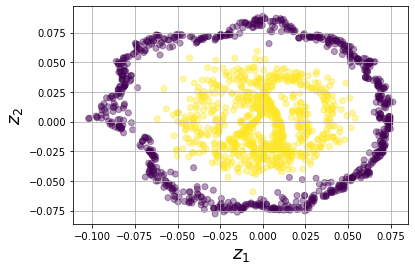

In [65]:
X_lle_compression = lle.transform(X_std)

plt.scatter(X_lle_compression[:, 0], X_lle_compression[:, 1], c=t, alpha=0.4)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.grid(True)

plt.show()

In [66]:
lle4 = LocallyLinearEmbedding(n_components=2, n_neighbors=4, random_state=23)
lle6 = LocallyLinearEmbedding(n_components=2, n_neighbors=6, random_state=23)
lle8 = LocallyLinearEmbedding(n_components=2, n_neighbors=8, random_state=23)
lle10 = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=23)
lle12 = LocallyLinearEmbedding(n_components=2, n_neighbors=12, random_state=23)
lle14 = LocallyLinearEmbedding(n_components=2, n_neighbors=14, random_state=23)
lle16 = LocallyLinearEmbedding(n_components=2, n_neighbors=16, random_state=23)
lle18 = LocallyLinearEmbedding(n_components=2, n_neighbors=18, random_state=23)

X_lle4 = lle4.fit_transform(X_std)
X_lle6 = lle6.fit_transform(X_std)
X_lle8 = lle8.fit_transform(X_std)
X_lle10 = lle10.fit_transform(X_std)
X_lle12 = lle12.fit_transform(X_std)
X_lle14 = lle14.fit_transform(X_std)
X_lle16 = lle16.fit_transform(X_std)
X_lle18 = lle16.fit_transform(X_std)

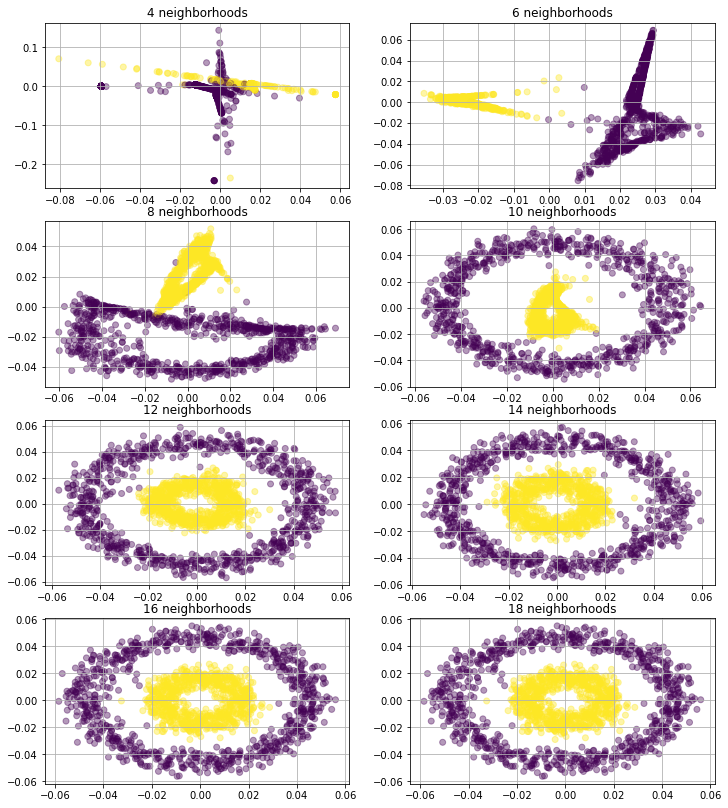

In [67]:
plt.figure(figsize=(12,14))

plt.subplot(4,2,1)
plt.title('4 neighborhoods')
plt.scatter(X_lle4[:, 0], X_lle4[:, 1], c=t, alpha=0.4)
plt.grid(True)

plt.subplot(4,2,2)
plt.title('6 neighborhoods')
plt.scatter(X_lle6[:, 0], X_lle6[:, 1], c=t, alpha=0.4)
plt.grid(True)

plt.subplot(4,2,3)
plt.title('8 neighborhoods')
plt.scatter(X_lle8[:, 0], X_lle8[:, 1], c=t, alpha=0.4)
plt.grid(True)

plt.subplot(4,2,4)
plt.title('10 neighborhoods')
plt.scatter(X_lle10[:, 0], X_lle10[:, 1], c=t, alpha=0.4)
plt.grid(True)

plt.subplot(4,2,5)
plt.title('12 neighborhoods')
plt.scatter(X_lle12[:, 0], X_lle12[:, 1], c=t, alpha=0.4)
plt.grid(True)

plt.subplot(4,2,6)
plt.title('14 neighborhoods')
plt.scatter(X_lle14[:, 0], X_lle14[:, 1], c=t, alpha=0.4)
plt.grid(True)

plt.subplot(4,2,7)
plt.title('16 neighborhoods')
plt.scatter(X_lle16[:, 0], X_lle16[:, 1], c=t, alpha=0.4)
plt.grid(True)

plt.subplot(4,2,8)
plt.title('18 neighborhoods')
plt.scatter(X_lle18[:, 0], X_lle18[:, 1], c=t, alpha=0.4)
plt.grid(True)
plt.savefig("n_neighbor_LLE.png",dpi=400)
plt.show()

(1600, 2)


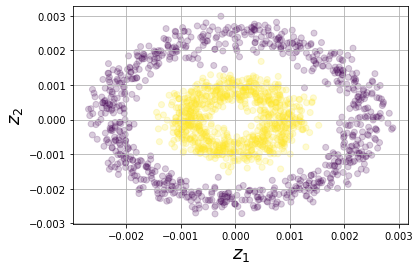

In [68]:
se = SpectralEmbedding(affinity="rbf")
X_se_compression = se.fit_transform(X_std)
print(X_se_compression.shape)
plt.scatter(X_se_compression[:, 0], X_se_compression[:, 1], c=t, alpha=0.2)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.grid(True)

plt.show()

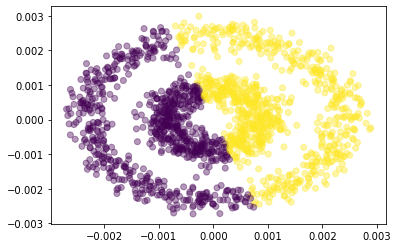

In [70]:
knn = KMeans(n_clusters=2, n_init=100, max_iter=300, tol=0.0001)
se_pred = knn.fit_predict(X_se_compression)

plt.scatter(X_se_compression[:,0], X_se_compression[:,1], c = se_pred, alpha=0.4)

plt.show()

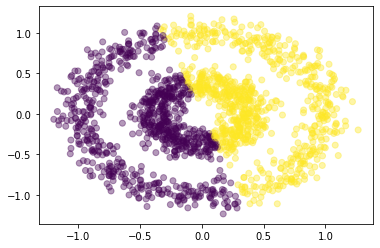

In [71]:
plt.scatter(X[:,0], X[:,1], c = se_pred, alpha=0.4)
plt.show()

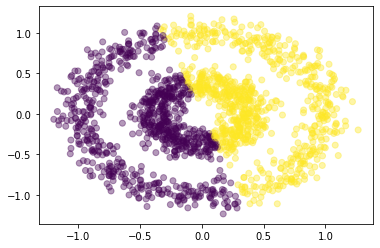

In [72]:
plt.scatter(X[:,0], X[:,1], c = se_pred, alpha=0.4)
plt.show()

(1600, 2)


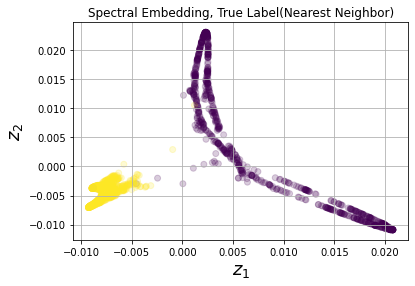

In [5]:
se = SpectralEmbedding(n_neighbors=8, affinity="nearest_neighbors")
X_se_compression = se.fit_transform(X_std)
print(X_se_compression.shape)

plt.title('Spectral Embedding, True Label(Nearest Neighbor)')
plt.scatter(X_se_compression[:, 0], X_se_compression[:, 1], c=t, alpha=0.2)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.grid(True)

plt.savefig("n_neighbor_Spectral(TrueLabel).png", dpi=400)
plt.show()

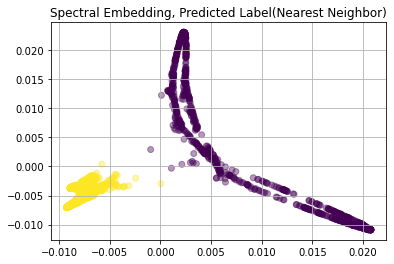

In [7]:
knn = KMeans(n_clusters=2, n_init=100, max_iter=300, tol=0.0001)
se_pred = knn.fit_predict(X_se_compression)

plt.title('Spectral Embedding, Predicted Label(Nearest Neighbor)')
plt.scatter(X_se_compression[:,0], X_se_compression[:,1], c = se_pred, alpha=0.4)
plt.grid(True)

plt.savefig("n_neighbor_Spectral(PredLabel).png", dpi=400)
plt.show()

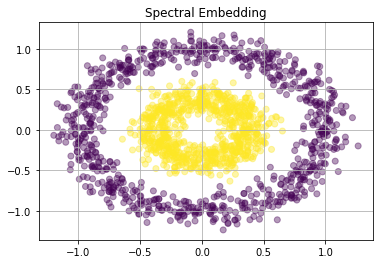

In [8]:
plt.scatter(X[:,0], X[:,1], c = se_pred, alpha=0.4)
plt.title('Spectral Embedding')
plt.grid(True)

plt.savefig("n_neighbor_Spectral(OriginalPlot).png", dpi=400)
plt.show()

In [22]:
se4_1 = SpectralEmbedding(n_neighbors=4, random_state=23)
se6_1 = SpectralEmbedding(n_neighbors=6, random_state=23)
se8_1 = SpectralEmbedding(n_neighbors=8, random_state=23)
se10_1 = SpectralEmbedding(n_neighbors=10, random_state=23)
se12_1 = SpectralEmbedding(n_neighbors=12, random_state=23)
se14_1 = SpectralEmbedding(n_neighbors=14, random_state=23)
se16_1 = SpectralEmbedding(n_neighbors=16, random_state=23)
se18_1 = SpectralEmbedding(n_neighbors=18, random_state=23)
se50_1 = SpectralEmbedding(n_neighbors=50, random_state=23)
se100_1 = SpectralEmbedding(n_neighbors=100, random_state=23)

X_se4_1 = se4_1.fit_transform(X)
X_se6_1 = se6_1.fit_transform(X)
X_se8_1 = se8_1.fit_transform(X)
X_se10_1 = se10_1.fit_transform(X)
X_se12_1 = se12_1.fit_transform(X)
X_se14_1 = se14_1.fit_transform(X)
X_se16_1 = se16_1.fit_transform(X)
X_se18_1 = se18_1.fit_transform(X)
X_se50_1 = se50_1.fit_transform(X)
X_se100_1 = se100_1.fit_transform(X)

/Users/deliciouscat/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [23]:
X_lle4_1.shape

(1600, 2)

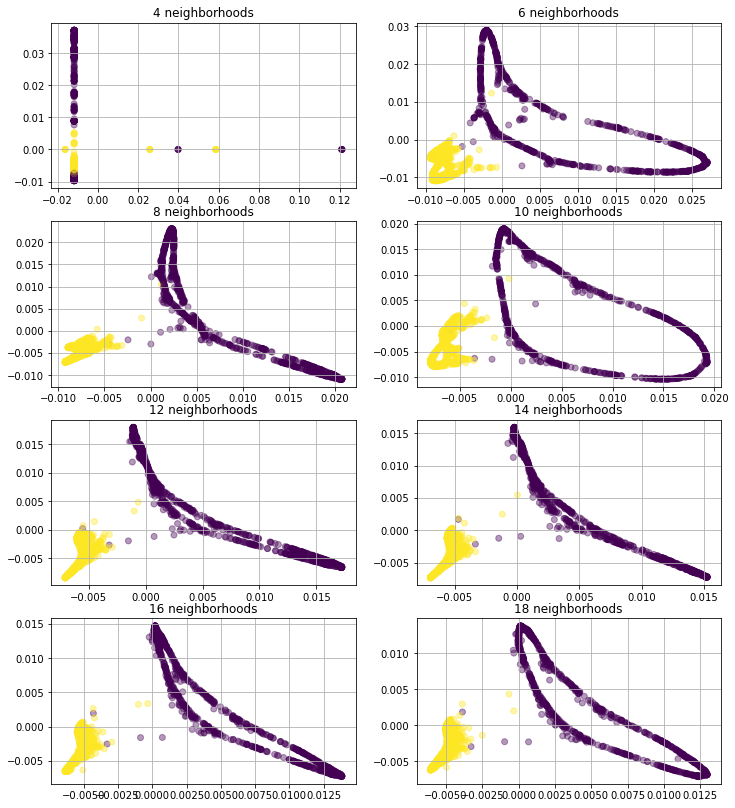

In [26]:
plt.figure(figsize=(12,14))

plt.subplot(4,2,1)
plt.title('4 neighborhoods')
plt.scatter(X_se4_1[:, 0], X_se4_1[:, 1], c=t, alpha=0.4)
plt.grid(True)

plt.subplot(4,2,2)
plt.title('6 neighborhoods')
plt.scatter(X_se6_1[:, 0], X_se6_1[:, 1], c=t, alpha=0.4)
plt.grid(True)

plt.subplot(4,2,3)
plt.title('8 neighborhoods')
plt.scatter(X_se8_1[:, 0], X_se8_1[:, 1], c=t, alpha=0.4)
plt.grid(True)

plt.subplot(4,2,4)
plt.title('10 neighborhoods')
plt.scatter(X_se10_1[:, 0], X_se10_1[:, 1], c=t, alpha=0.4)
plt.grid(True)

plt.subplot(4,2,5)
plt.title('12 neighborhoods')
plt.scatter(X_se12_1[:, 0], X_se12_1[:, 1], c=t, alpha=0.4)
plt.grid(True)

plt.subplot(4,2,6)
plt.title('14 neighborhoods')
plt.scatter(X_se14_1[:, 0], X_se14_1[:, 1], c=t, alpha=0.4)
plt.grid(True)

plt.subplot(4,2,7)
plt.title('16 neighborhoods')
plt.scatter(X_se16_1[:, 0], X_se16_1[:, 1], c=t, alpha=0.4)
plt.grid(True)

plt.subplot(4,2,8)
plt.title('18 neighborhoods')
plt.scatter(X_se18_1[:, 0], X_se18_1[:, 1], c=t, alpha=0.4)
plt.grid(True)


plt.savefig("n_neighbor_Spectral.png",dpi=400)
plt.show()

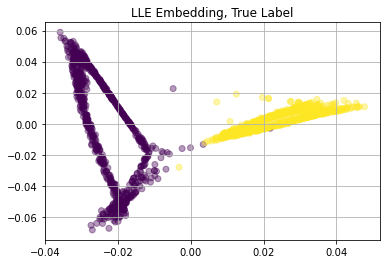

In [11]:
llee = LocallyLinearEmbedding(n_components=2, n_neighbors=7, random_state=23)

X_llee = llee.fit_transform(X)
plt.title('LLE Embedding, True Label')
plt.scatter(X_llee[:, 0], X_llee[:, 1], c=t, alpha=0.4)
plt.grid(True)

plt.savefig("LLE(TrueLabel).png",dpi=400)
plt.show()

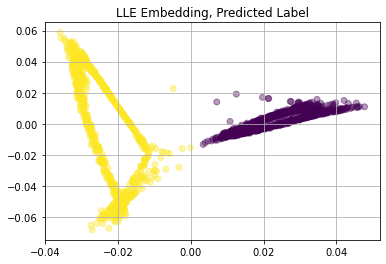

In [13]:
knn = KMeans(n_clusters=2, n_init=100, max_iter=300, tol=0.0001)
lle_pred = knn.fit_predict(X_llee)

plt.title('LLE Embedding, Predicted Label')
plt.scatter(X_llee[:,0], X_llee[:,1], c = lle_pred, alpha=0.4)
plt.grid(True)

plt.savefig("LLE(PredLabel).png",dpi=400)
plt.show()

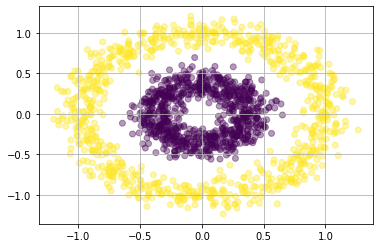

In [14]:
plt.scatter(X[:,0], X[:,1], c = lle_pred, alpha=0.4)
plt.grid(True)
plt.savefig("n_neighbor_LLE(OriginalPlot).png", dpi=400)
plt.show()

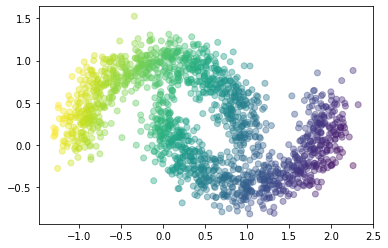

In [188]:
lle18_1 = LocallyLinearEmbedding(n_components=1, n_neighbors=18, random_state=23)
X_lle18_1 = lle18_1.fit_transform(X)
plt.scatter(X[:,0], X[:,1], c = X_lle18_1, alpha=0.4)
plt.show()